# School Depths

Extra content which in the end was not included in the report, nevertheless it can provide some interesting considerations jointly with Index_weighting.ipynb

In this R notebook, we compute the depth of each school wrt the indexes which we built, focusing on the principal questionnaire. 

We build two dataframes with the main depths, using both the raw indexes and the debiased indexes. We can use these results to further investigate the outlier schools or the regional differences, looking at the mean depth of the region's schools.

In [18]:
library(MASS)
library(DepthProc)
library(ddalpha)

In [1]:
# NB These dataframes have to be generated using Index_weighting.ipynb
df_debias = read.csv('../Data/Indici.csv')
df_raw = read.csv('../Data/Indici_raw.csv')

In [44]:
depths_df <- function(df, indexes = 1:2){
    tukey = depthTukey(as.matrix(df[indexes]), ndir = 20000)
    mah = depthMah(as.matrix(df[indexes]), as.matrix(df[indexes]))
    lp = depthLP(as.matrix(df[indexes]), as.matrix(df[indexes]), pdim = 9)
    local = depthLocal(as.matrix(df[indexes]), as.matrix(df[indexes]), depth_params1 = list(method = "LP"))
    spatial = ddalpha::depth.spatial(as.matrix(df[indexes]), as.matrix(df[indexes]))
    potential = ddalpha::depth.potential(as.matrix(df[indexes]), as.matrix(df[indexes]), pretransform = "1Mom", kernel = "GKernel", kernel.bandwidth = NULL, mah.parMcd = 0.75)
    zonoid = ddalpha::depth.zonoid(as.matrix(df[indexes]), as.matrix(df[indexes]), seed = 0)
    deep = data.frame(tukey, mah, lp, local, spatial, potential, zonoid) 
    return(deep)
}

In [34]:
raw = depths_df(df_raw)
debias = depths_df(df_debias)

In [42]:
corr <- round(cor(raw), 2)
corr

,tukey,mah,lp,local,spatial,potential,zonoid
tukey,1.00,0.86,0.47,0.59,0.79,0.67,0.93
mah,0.86,1.00,0.62,0.81,0.99,0.83,0.78
lp,0.47,0.62,1.00,0.88,0.66,0.42,0.34
local,0.59,0.81,0.88,1.00,0.85,0.63,0.46
spatial,0.79,0.99,0.66,0.85,1.00,0.81,0.69
potential,0.67,0.83,0.42,0.63,0.81,1.00,0.62
zonoid,0.93,0.78,0.34,0.46,0.69,0.62,1.00


In [43]:
corr2 <- round(cor(debias), 2)
corr2

,tukey,mah,lp,local,spatial,potential,zonoid
tukey,1.00,0.84,0.41,0.43,0.75,0.61,0.98
mah,0.84,1.00,0.63,0.73,0.98,0.83,0.78
lp,0.41,0.63,1.00,0.95,0.64,0.54,0.36
local,0.43,0.73,0.95,1.00,0.76,0.66,0.37
spatial,0.75,0.98,0.64,0.76,1.00,0.83,0.68
potential,0.61,0.83,0.54,0.66,0.83,1.00,0.55
zonoid,0.98,0.78,0.36,0.37,0.68,0.55,1.00


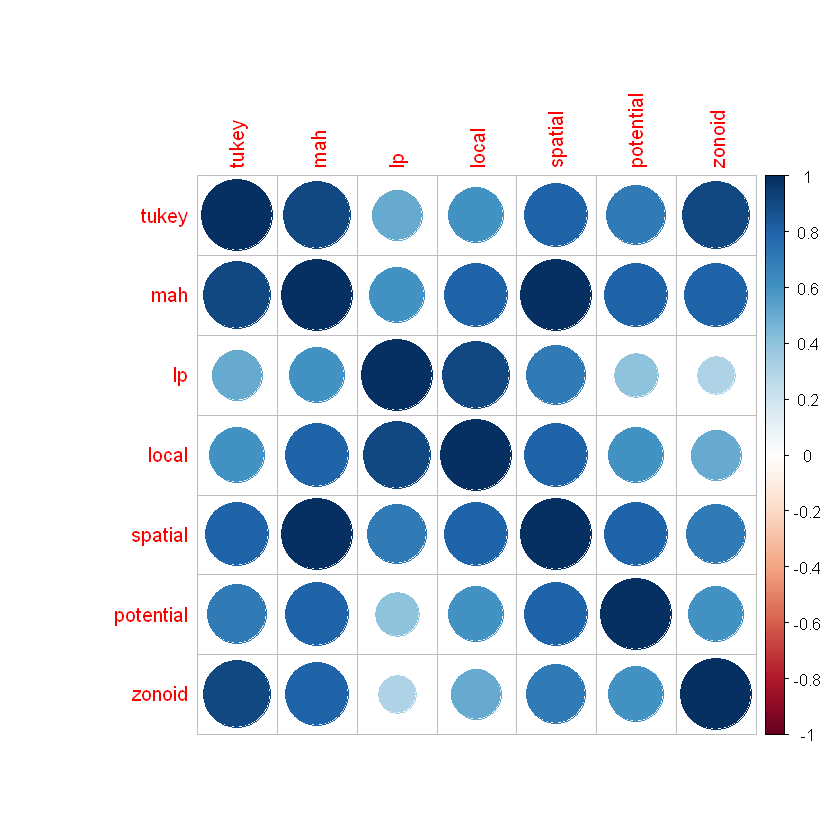

In [39]:
library(corrplot)
corrplot(corr)

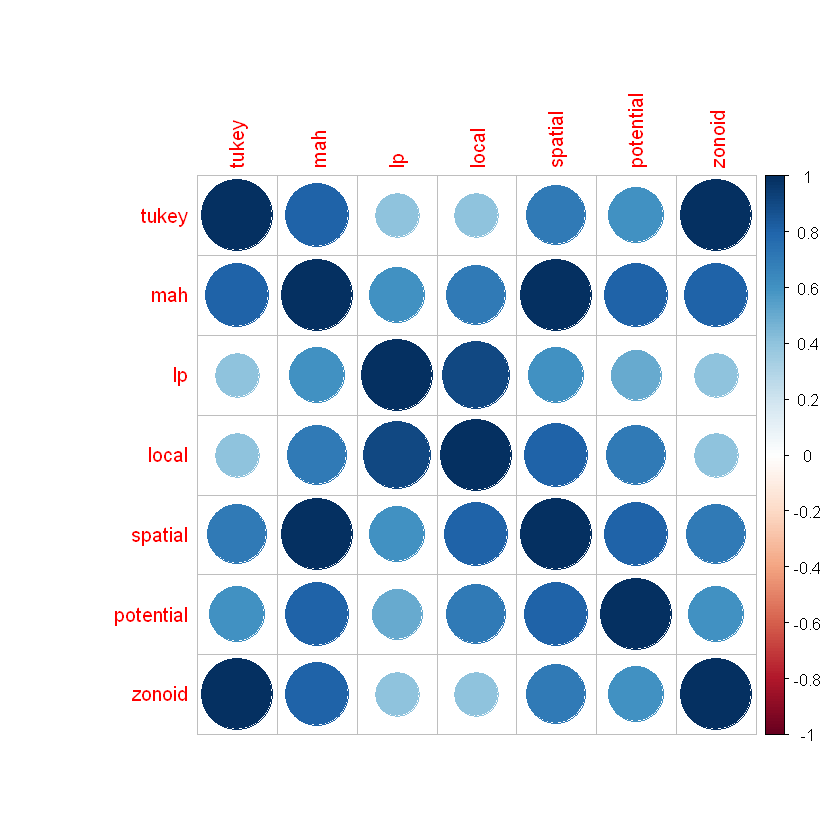

In [40]:
corrplot(corr2)

In [41]:
write.csv(debias, '../Data/Depths_debias.csv', row.names = FALSE)
write.csv(raw, '../Data/Depths_raw.csv', row.names = FALSE)